<a href="https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/ProcessDataWecode/Dead24_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wecode = pd.read_csv('/content/gdrive/MyDrive/Dien_studies_all_times/MachineLearning/LogisticRegression/Data/wecode.csv')
score = pd.read_csv('/content/gdrive/MyDrive/Dien_studies_all_times/MachineLearning/LogisticRegression/Data/score_training.csv')

In [35]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


## **EDIT WECODE FILE**

In [39]:
new_wecode = pd.DataFrame(wecode['user_id'])
new_wecode['Sum_Problems'] = pd.DataFrame(wecode['is_final'])
new_wecode.insert(2,'Sum_Submits', 1)
new_wecode['Sum_Correct_Submits'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
new_wecode['Sum_Correct_Problems'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))
new_wecode['Sum_Last_Scores'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]
new_wecode.columns = ['id', 'Sum_Problems', 'Sum_Correct_Submits', 'Sum_Submits', 'Sum_Correct_Problems', 'Sum_Last_Scores']
new_wecode = new_wecode.groupby(['id']).sum()

In [40]:
# Idea 1
new_wecode['Idea_1'] = new_wecode['Sum_Correct_Problems'] / new_wecode['Sum_Problems'] 
# Idea 2
new_wecode['Idea_2'] = new_wecode['Sum_Problems'] / new_wecode['Sum_Submits']
# Idea 3
new_wecode['Idea_3'] = new_wecode['Sum_Correct_Submits'] / new_wecode['Sum_Submits']
# Idea 4
new_wecode['Idea_4'] = new_wecode['Sum_Last_Scores']
# Idea 5

# Idea 6
new_wecode['Idea_6_1'] = new_wecode['Sum_Last_Scores']
new_wecode['Idea_6_2'] = new_wecode['Sum_Submits']


In [41]:
new_wecode

,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_6_1,Idea_6_2
id,,,,,,,,,,,
1,2,2,1,1,10000.0,0.500000,2.000000,2.000000,10000.0,10000.0,1
4,38,54,44,37,370000.0,0.973684,0.863636,1.227273,370000.0,370000.0,44
5,5,6,3,3,30000.0,0.600000,1.666667,2.000000,30000.0,30000.0,3
6,88,130,89,85,850000.0,0.965909,0.988764,1.460674,850000.0,850000.0,89
7,2,5,0,0,9209.0,0.000000,inf,inf,9209.0,9209.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1860,48,76,29,28,329665.0,0.583333,1.655172,2.620690,329665.0,329665.0,29
1862,6,12,4,4,40000.0,0.666667,1.500000,3.000000,40000.0,40000.0,4
1864,63,187,30,28,439741.0,0.444444,2.100000,6.233333,439741.0,439741.0,30


## **EDIT SCORE FILE**

In [43]:
CK = score[['id','CK']]
CK

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


## **MERGE**

In [46]:
data_merge = pd.merge(new_wecode,CK,on='id',how='outer')
data_merge

,id,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_6_1,Idea_6_2,CK
0,1,2.0,2.0,1.0,1.0,10000.0,0.500000,2.000000,2.000000,10000.0,10000.0,1.0,NaN
1,4,38.0,54.0,44.0,37.0,370000.0,0.973684,0.863636,1.227273,370000.0,370000.0,44.0,NaN
2,5,5.0,6.0,3.0,3.0,30000.0,0.600000,1.666667,2.000000,30000.0,30000.0,3.0,NaN
3,6,88.0,130.0,89.0,85.0,850000.0,0.965909,0.988764,1.460674,850000.0,850000.0,89.0,NaN
4,7,2.0,5.0,0.0,0.0,9209.0,0.000000,inf,inf,9209.0,9209.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5
1277,1664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1278,1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1279,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [47]:
data_merge = data_merge.dropna()

In [48]:
data_merge

,id,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems,Sum_Last_Scores,Idea_1,Idea_2,Idea_3,Idea_4,Idea_6_1,Idea_6_2,CK
9,24,77.0,164.0,80.0,72.0,750299.0,0.935065,0.962500,2.050000,750299.0,750299.0,80.0,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,0.600000,1.250000,3.250000,39000.0,39000.0,4.0,10
11,29,80.0,199.0,75.0,72.0,762760.0,0.900000,1.066667,2.653333,762760.0,762760.0,75.0,8.5
13,34,84.0,218.0,81.0,81.0,822888.0,0.964286,1.037037,2.691358,822888.0,822888.0,81.0,6.5
14,35,151.0,297.0,152.0,145.0,1477000.0,0.960265,0.993421,1.953947,1477000.0,1477000.0,152.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,270790.0,0.741935,1.347826,2.782609,270790.0,270790.0,23.0,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,0.925000,1.081081,1.486486,386000.0,386000.0,37.0,4
1153,1859,30.0,31.0,3.0,3.0,39000.0,0.100000,10.000000,10.333333,39000.0,39000.0,3.0,1.5
1155,1862,6.0,12.0,4.0,4.0,40000.0,0.666667,1.500000,3.000000,40000.0,40000.0,4.0,7.5


## **VISUALIZATION**

In [50]:
data_plot = data_merge.copy()

In [51]:
data_plot=data_plot.sort_values(by='CK')

### **Idea 1:** Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit

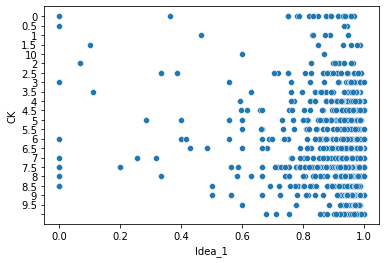

In [52]:
sns.scatterplot(x="Idea_1", y="CK", data=data_plot)

### **Idea 2:** Tổng số problem đã sumbit / Tổng số submissions 


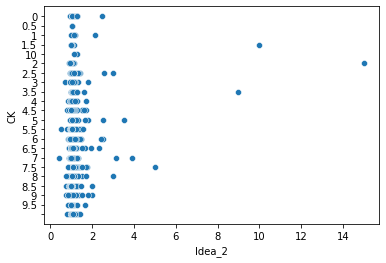

In [53]:
sns.scatterplot(x="Idea_2", y="CK", data=data_plot)

### **Idea 3:** Số lần submit đúng (pre_score=10000) / tổng số submissions


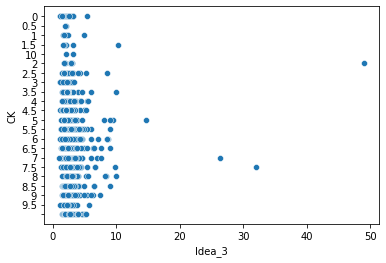

In [58]:
sns.scatterplot(x="Idea_3", y="CK", data=data_plot)

### **Idea 4:** Tổng pre_score của các submssion có is_final = 1 


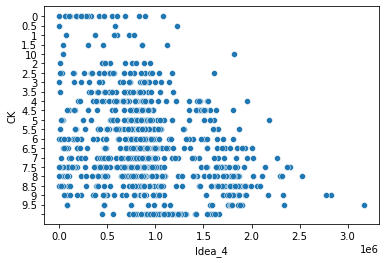

In [55]:
sns.scatterplot(x="Idea_4", y="CK", data=data_plot)

### **Idea 6_1:** Tổng của max pre_score của mỗi problem_id


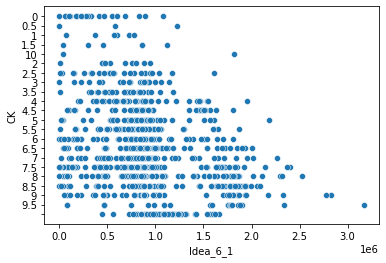

In [56]:
sns.scatterplot(x="Idea_6_1", y="CK", data=data_plot)

### **Idea 6_2:** Tổng số submission


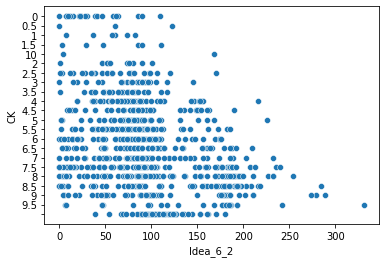

In [57]:
sns.scatterplot(x="Idea_6_2", y="CK", data=data_plot)